# ADALINE y el descenso por gradiente

En esta práctica, exploraremos el regresor ADALINE (Adaptive Linear Neuron), propuesto por Bernard Widrow. ADALINE es un modelo de regresión lineal que utiliza una función de activación lineal y se entrena mediante el algoritmo de descenso por gradiente.

Implementaremos por primera vez dentro del curso el proceso de descenso por gradiente, el cual es una técnica de optimización utilizada para minimizar la función de costo ajustando iterativamente los parámetros del modelo. Este proceso nos permitirá encontrar los valores óptimos de los pesos y el sesgo del modelo ADALINE para predecir con mayor precisión los salarios en función de los años de experiencia.

A lo largo de la práctica, seguiremos los siguientes pasos:
1. Cargar y visualizar el conjunto de datos.
2. Implementar la clase ADALINE.
3. Entrenar el modelo utilizando el descenso por gradiente.
4. Evaluar el rendimiento del modelo.
5. Visualizar los resultados obtenidos.

Esta práctica nos ayudará a comprender mejor el funcionamiento del modelo ADALINE y la importancia del descenso por gradiente en el entrenamiento de modelos de aprendizaje automático.

NOTA: Si utilizas colab deberás de cargar el conjunto de datos. Si usas kaggle el conjunto de datos carga de forma automática.


## El conjunto de datos

Utilizaremos un conjunto de datos de una sola variable, el regresor son los años de experiencia y el regresando es el salario. Esta relación está modelada como un fenómero correlacionado de forma positiva. Es decir, esperamos que a mayor experiencia mayor sea el salario.

El conjunto de datos se provee con esta práctica, pero si no, se puede descargar desde:
https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

# Read the dataset 'salary' as a pandas dataframe with the first row as the header
salary_df = pd.read_csv('files/Salary_dataset.csv', header=0)

# Display the first few rows of the dataframe
salary_df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


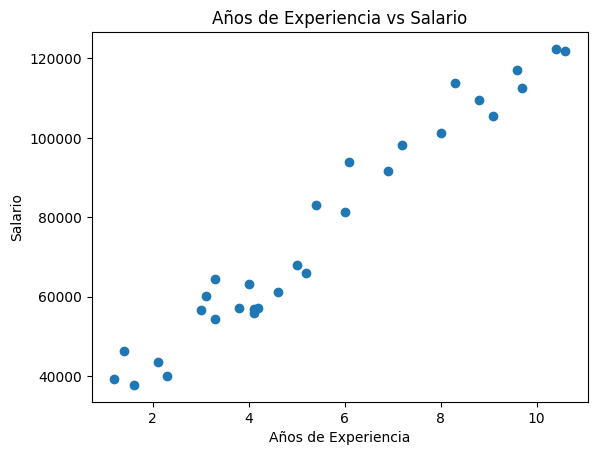

In [22]:
plt.scatter(salary_df['YearsExperience'], salary_df['Salary'])
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.title('Años de Experiencia vs Salario')
plt.show()

## ADALINE

El modelo ADALINE (Adaptive Linear Neuron) fue propuesto por Bernard Widrow y es un modelo de regresión lineal que utiliza una función de activación lineal. A diferencia del perceptrón de Rosenblatt, que utiliza una función de activación escalón, 

$ \hat{y} = \mathbf{w} \cdot \mathbf{x} + b $

donde:
- $ \hat{y} $ es la salida del modelo.
- $\mathbf{w} $ es el vector de pesos.
- $ \mathbf{x} $ es el vector de características de entrada.
- $ b $ es el sesgo (bias).



In [23]:
# Clase para el modelo ADALINE
class ADALINE:
    def __init__(self, input_size):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def predict(self, inputs):
        return np.dot(inputs, self.weights) + self.bias
    

In [24]:
# Crear una instancia de la clase ADALINE
adaline = ADALINE(input_size=1)

print(adaline.weights)
print(adaline.bias)

# Predecir los valores utilizando el dataset
X = salary_df['YearsExperience'].values.reshape(-1, 1)
y_pred = adaline.predict(X)


[0.48334554]
0.7097732979678998


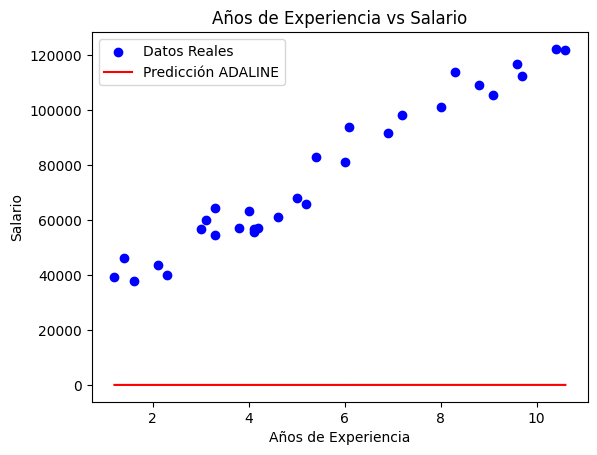

In [25]:
# Graficar los resultados para el modelo sin entrenar
plt.scatter(salary_df['YearsExperience'], salary_df['Salary'], color='blue', label='Datos Reales')
plt.plot(salary_df['YearsExperience'], y_pred, color='red', label='Predicción ADALINE')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.title('Años de Experiencia vs Salario')
plt.legend()
plt.show()

La función de costo (error) se define como el Error Cuadrático Medio:
$ E(\mathbf{w}, b) = \frac{1}{2N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $
donde:
- $E(\mathbf{w}, b)$ es la función de costo.
- $ N $ es el número de muestras.
- $ y_i $ es el valor real de la \( i \)-ésima muestra.
- $ \hat{y}_i $ es el valor predicho por el modelo para la \( i \)-ésima muestra.


In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


Error Cuadrático Medio: 6502070124.030503


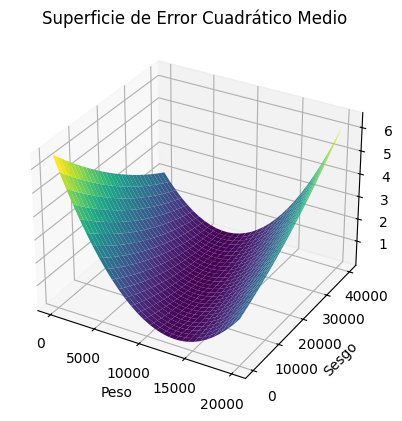

In [50]:
from mpl_toolkits.mplot3d import Axes3D

# Crear una malla de valores para los pesos y el sesgo
weight_range = np.linspace(-0000, 20000, 30)
bias_range = np.linspace(0000, 40000, 30)
W, B = np.meshgrid(weight_range, bias_range)


# Calcular el MSE para cada combinación de peso y sesgo
mse_surface = np.zeros(W.shape)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        adaline.weights = np.array([W[i, j]])
        adaline.bias = B[i, j]
        y_pred = adaline.predict(X)
        mse_surface[i, j] = mean_squared_error(salary_df['Salary'], y_pred)

# Crear la gráfica de superficie
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, mse_surface, cmap='viridis')

ax.set_xlabel('Peso')
ax.set_ylabel('Sesgo')
ax.set_zlabel('Error Cuadrático Medio (MSE)')
ax.set_title('Superficie de Error Cuadrático Medio')

plt.show()

El aprendizaje en el modelo ADALINE se basa en la minimización del error cuadrático medio (MSE) a través del método de descenso por gradiente.

$ \mathbf{w} \leftarrow \mathbf{w} + \eta \sum_{i=1}^{N} (y_i - \hat{y}_i) \mathbf{x}_i$

$ b \leftarrow b + \eta \sum_{i=1}^{N} (y_i - \hat{y}_i)$

donde:

$ \eta $ es la tasa de aprendizaje.

In [37]:
learning_rate = 0.0001
iterations = 1000

history = []

for i in range(iterations):
    for j in range(len(X)):
        y_pred = adaline.predict(X[j])
        error = salary_df['Salary'][j] - y_pred
        adaline.weights += learning_rate * error * X[j]
        adaline.bias += learning_rate * error

    history.append(mean_squared_error(salary_df['Salary'], adaline.predict(X)))

print(f"Best parameters: w:{adaline.weights}, b:{adaline.bias}")


Best parameters: w:[9965.66306085], b:21273.86846008268


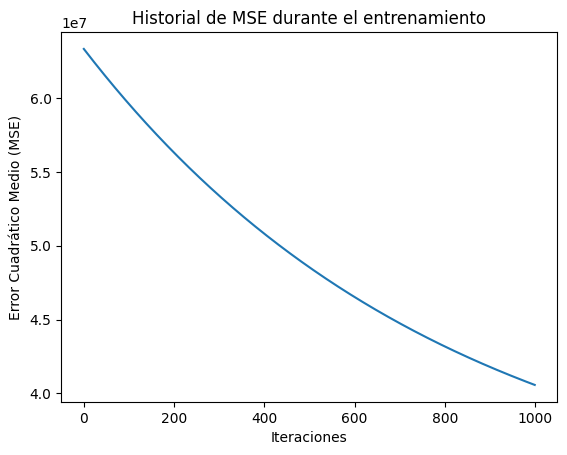

In [16]:
plt.plot(history)
plt.xlabel('Iteraciones')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Historial de MSE durante el entrenamiento')
plt.show()

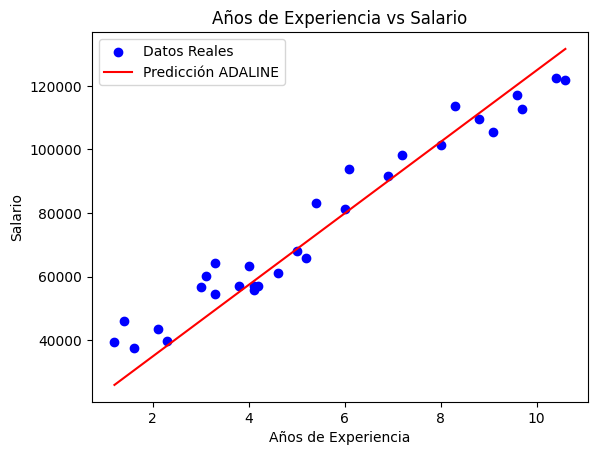

In [13]:
y_pred = adaline.predict(X)

plt.scatter(salary_df['YearsExperience'], salary_df['Salary'], color='blue', label='Datos Reales')
plt.plot(salary_df['YearsExperience'], y_pred, color='red', label='Predicción ADALINE')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.title('Años de Experiencia vs Salario')
plt.legend()
plt.show()
